# Ford GoBike System Data 
# Udacity Project
## by Assemgul Kaiyrzhan 
# Preliminary Wrangling

> For this project I use data from 2017 year 


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
%matplotlib inline

In [37]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [28]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [29]:
df.shape

(519700, 13)

In [31]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

> We can see we don't have problem with null values and also duplicates


In [32]:
df.duplicated().sum()

0

In [35]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

> But if we need detaled see out datatypes, so we need change start_time and end_time 

### What is the structure of your dataset?

> In dataset we have 519700 row 13 columns.Users are divided into two groups: Subscriber and Customer. An important variable is the duration of the trip in seconds.There are also tables with full distances and street names.

### What is/are the main feature(s) of interest in your dataset?

> I would like to consider in detail their difference in user type, as well as the total distance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think I will use all the columns for analysis

## Assess and Clean

### 1) Assess:
> dtypes:
- start_time need to be datetime not objest
- end_time need to be datetime not objest
- start_station_id as String object
- end_station_id as String object
- bike_id as string 
- user_type as categorical


### 1) Clean:

In [38]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)
df.user_type = df.user_type.astype('category')

In [39]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
dtype: object

### 2) Assess:
> Devide start and end date by Month, Week day, hour
### 2) Clean:

In [43]:
df['Month'] = df.start_time.dt.strftime('%b')
df['Day'] = df.start_time.dt.strftime('%a')
df['Hour'] = df.start_time.dt.strftime('%H')

In [46]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,Month,Day,Hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Dec,Sun,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Dec,Sun,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Dec,Sun,22


> Final version of dataframe

In [47]:
df_clean = df.copy()
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,Month,Day,Hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Dec,Sun,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Dec,Sun,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Dec,Sun,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Dec,Sun,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Dec,Sun,14


## Univariate Exploration
> distribution of the main variable: duration

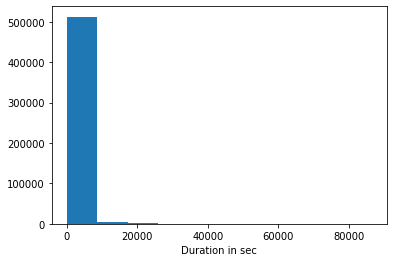

In [49]:
plt.hist(data=df_clean, x='duration_sec')
plt.xlabel('Duration in sec');

In [50]:
df_clean['duration_sec'].describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

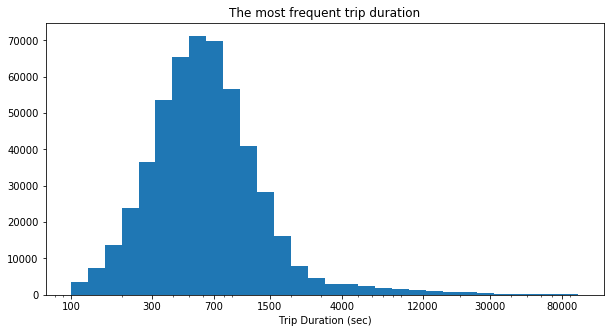

In [51]:
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df_clean, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (sec)')
plt.title('The most frequent trip duration')
plt.show();

> Let's see more detailed Month and Day of the trip 

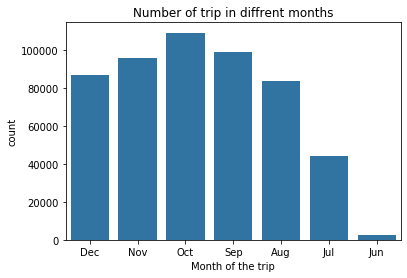

In [54]:
sb.countplot(data=df_clean, x='Month', color=sb.color_palette()[0]);
plt.xlabel('Month of the trip')
plt.title('Number of trip in diffrent months');

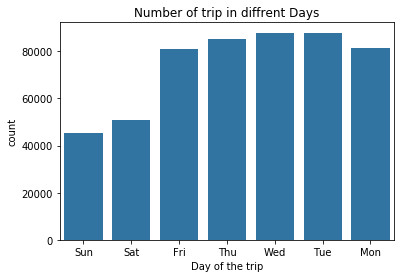

In [55]:
sb.countplot(data=df_clean, x='Day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

> Start Station Locations and End Station Locations

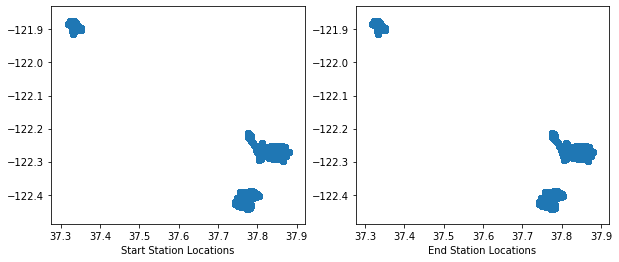

In [56]:
plt.figure(figsize=[10, 4])

plt.subplot(1, 2, 1)
plt.scatter(data=df_clean, x='start_station_latitude', y='start_station_longitude')
plt.xlabel('Start Station Locations')

plt.subplot(1, 2, 2)
plt.scatter(data=df_clean, x='end_station_latitude', y='end_station_longitude')
plt.xlabel('End Station Locations');

In [57]:
df_clean['distance'] = np.sqrt((df_clean.start_station_longitude - df_clean.end_station_longitude) ** 2
                               + (df_clean.start_station_latitude - df_clean.end_station_latitude) ** 2)

In [58]:
df_clean.distance.describe()

count    519700.000000
mean          0.015837
std           0.010032
min           0.000000
25%           0.009095
50%           0.013911
75%           0.020503
max           0.693662
Name: distance, dtype: float64

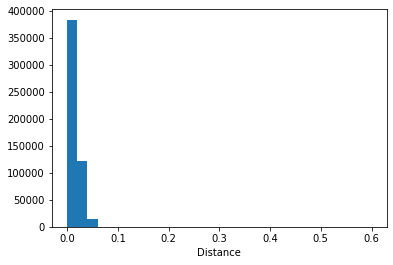

In [59]:
bins = np.arange(0, 0.6+0.02, 0.02)
plt.hist(data=df_clean, x='distance', bins=bins)
plt.xlabel('Distance');

<ipython-input-60-19830616c159>:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 0.1)


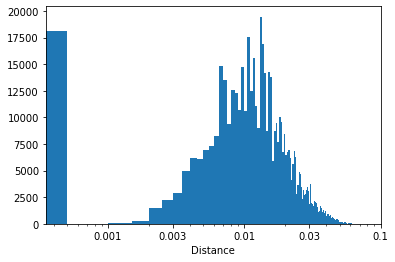

In [60]:
bins = np.arange(0, 0.6+0.0005, 0.0005)
ticks = [0.001, 0.003, 0.01, 0.03, 0.1]

plt.hist(data=df_clean, x='distance', bins=bins)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlim(0, 0.1)
plt.xlabel('Distance');

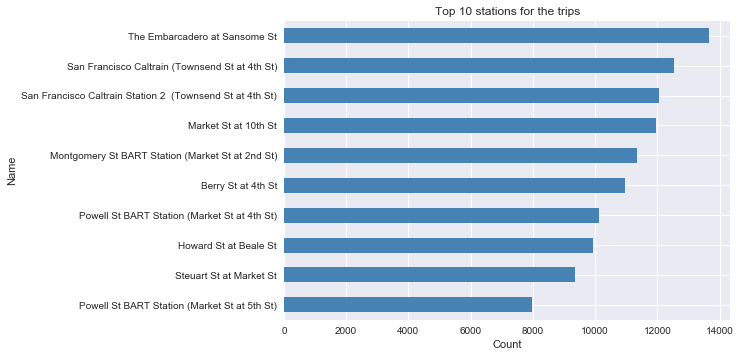

In [79]:
top_names = df_clean.start_station_name.value_counts()[1:11].sort_values()
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 stations for the trips')
plt.xlabel('Count')
plt.ylabel('Name');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> If we take a closer look at duration_sec, then we see that it is constantly transferred to the left side, and if we do a full transformation, we will see that the duration_sec was skweed and had many points; a massive transformation was required. Most of the glasses were under 25 minutes.

> According to the trips in months, we will notice that in October we have a large number of trips, the least number of trips we have in June.

> If we consider the trips by days of the week, we will notice that on Wednesday and Tuesday the same number of trips, the least on Sunday

> The plot shows several interesting things. First, there are 10,000 observations showing the distance is below 0.0005. This data indicates that the start and end locations are the same, with no change in longitude or latitude. Second, the rest of the data shows a unimodal distribution, and the peak is around 0.015.

> Top 1 of station it's The Embaracadero at Sansome St

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I created 3 additional columns to see the full picture of the trips.

## Bivariate Exploration
> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).


###  User Type and Hour/Month/Day

C:\Users\fzyj\AppData\Local\Continuum\anaconda2\envs\p3.8\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


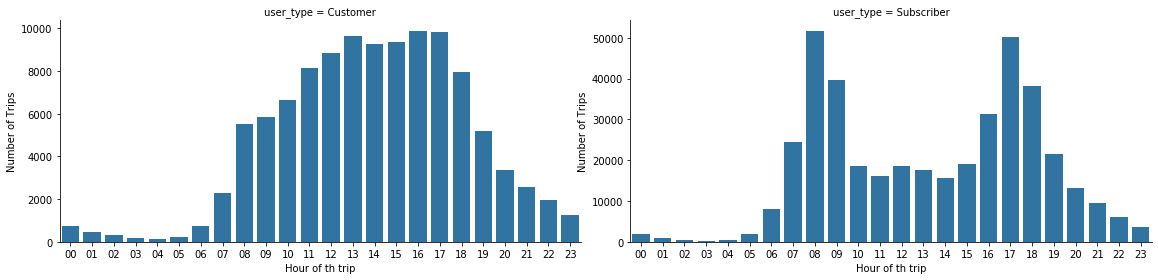

In [63]:
g = sb.FacetGrid(data=df_clean,col='user_type', col_wrap = 2, height = 4, aspect=2, sharey=False)
g.map(sb.countplot, 'Hour')
for i in range(2):
    g.axes[i].set_xlabel('Hour of th trip')
    g.axes[i].set_ylabel('Number of Trips')

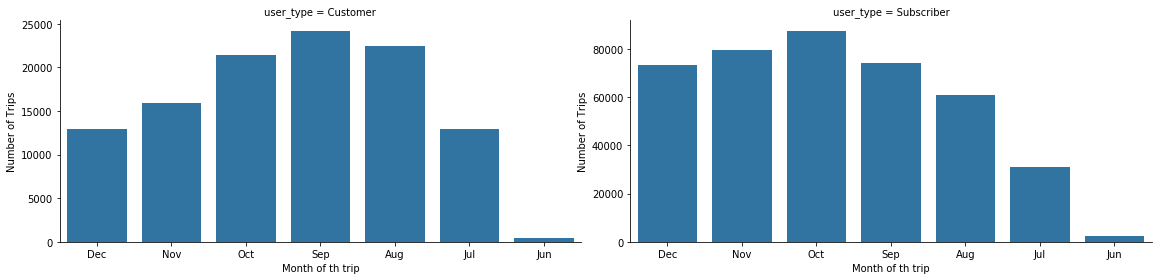

In [64]:
g = sb.FacetGrid(data=df_clean,col='user_type', col_wrap = 2, height = 4, aspect=2, sharey=False)
g.map(sb.countplot, 'Month')
for i in range(2):
    g.axes[i].set_xlabel('Month of th trip')
    g.axes[i].set_ylabel('Number of Trips')

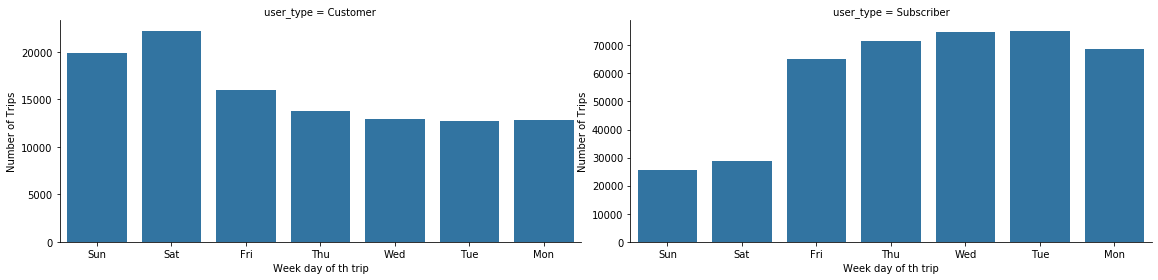

In [65]:
g = sb.FacetGrid(data=df_clean,col='user_type', col_wrap = 2, height = 4, aspect=2, sharey=False)
g.map(sb.countplot, 'Day')
for i in range(2):
    g.axes[i].set_xlabel('Week day of th trip')
    g.axes[i].set_ylabel('Number of Trips')

### Duration and Distance

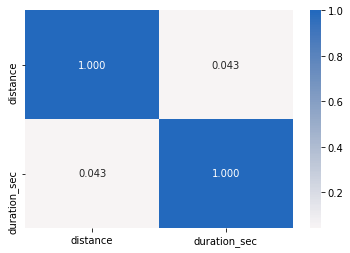

In [68]:
sb.heatmap(df_clean[['distance', 'duration_sec']].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

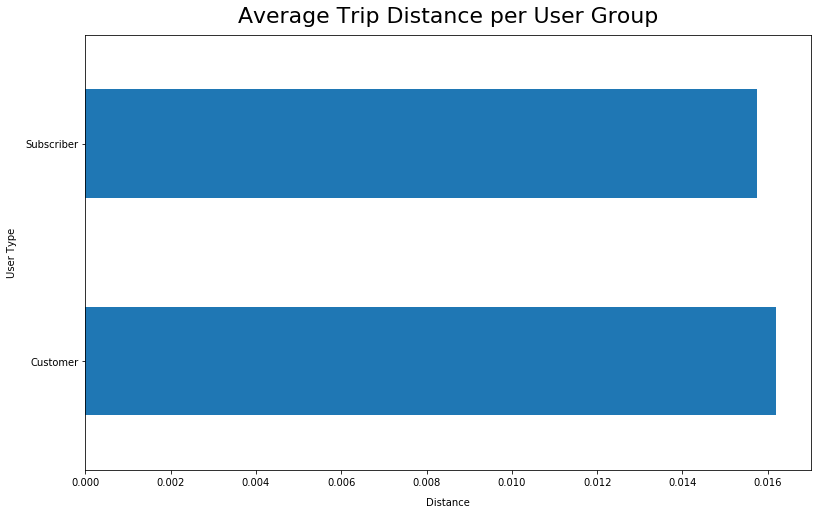

In [69]:
ax = df_clean.groupby('user_type')['distance'].mean().plot(kind='barh', figsize=(13,8))
ax.set_title('Average Trip Distance per User Group', fontsize=22, y=1.015)
ax.set_ylabel('User Type', labelpad=8)
ax.set_xlabel('Distance', labelpad=10);

In [71]:
df_clean.groupby('user_type')['distance'].mean()

user_type
Customer      0.016197
Subscriber    0.015739
Name: distance, dtype: float64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> If we look at the columns by user type and by hour, the subscriber has more leapfrogging hours than the customer.

> If we look at the columns by user type and by month, the customer in September has the most trips for the subscriber in October.

> If we look at the columns by user type and by day of the week, then the customer has a Saturday full of trips, and the subscriber has the most trips on weekdays.

> If we look at the duration and distance,  correlation between these two variables is low, indicating a false expectation.

> If we look at the columns by user type and average of distance, we only see a small difference between them - 0,000458

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> All columns are interconnected, according to the examples that I have considered

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

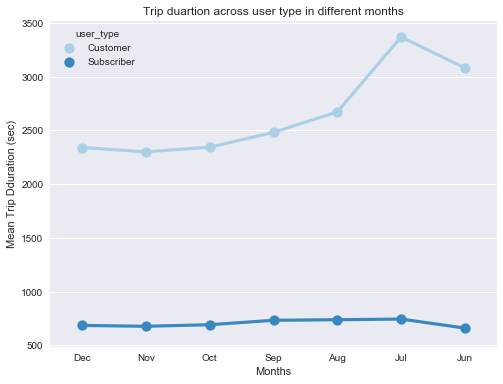

In [74]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'Month', y = 'duration_sec', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different months')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Months')
plt.show();

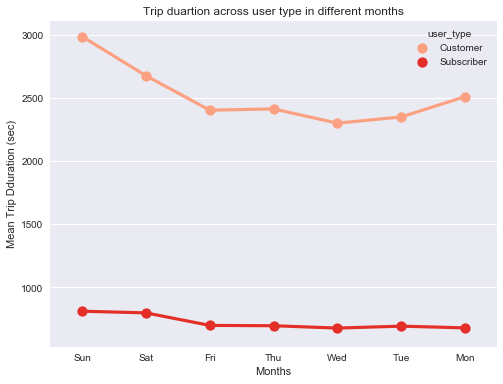

In [75]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'Day', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different Days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

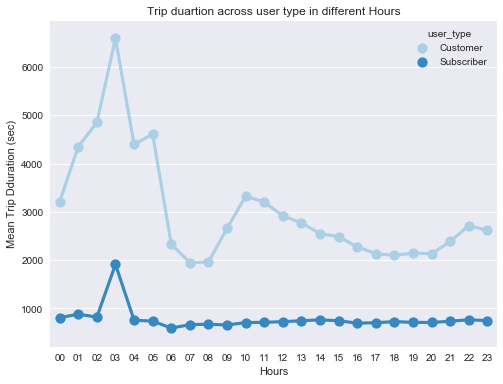

In [76]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'Hour', y = 'duration_sec', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different Hours')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Hours')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Trip duration in different months/days/hours, given the type of user, we now see that the Client has a much higher average trip duration.

> If we look at the type of user during the month of the trip, we really don't see any pattern with the other type of user.

### Were there any interesting or surprising interactions between features?

> The customer trip duration is longer than the average of the subscriber.

> Looking at the visualization, the subscriber is much less active than the customer, which surprised me.

In [80]:
df_clean.to_csv('df_clean.csv', index=False)